# Учись Учить Машину / Learn Machine Learning

<img src="data/lml.png">

Онлайн-лекции Ильи С. Елисеева: применение методов машинного обучения в анализе данных.

- Канал в Telegram: https://t.me/learn_machine_learn
- YouTube: https://www.youtube.com/channel/UCCwDwKatNitBCVAJajremMQ

---



# Лекция 1. Нестандартные распределения и статистические выбросы

## Немного теории: виды распределений вероятностей

При работе с количественными непрерывными и дискретными признаками вам возможно придется иметь дело со следующими видами распределений:
- __Равномерное__: любое значение в диапазоне равновероятно (потому и оно равномерное), нет ярко выраженной моды, все значения лежат в некотором диапазоне, гистограмма близка к "плоской", встречается редко, но если вам повезло и на гитограмме "плоско" - это признак машинногенерированных или последовательных данных, шума или намеренной обфускации.

- __Нормальное (Гауссово)__ - идеальный случай:
    - есть ярко выраженая мода (вершина "колокола Гаусса"), 
    - медиана приближена к среднему,
    - соответствует ЦПТ, ЗБЧ и другим "сферическим коням в вакууме" из мира статистики

    ПРИМЕРЫ: количество минут в телефонном разговоре, пробег грузовика за месяц, количество проданного хлеба за сутки и т.д.


- __Логнормальное__ - распределение, которое приводится к нормальному после логарифмирования величин. Характерно для следующих данных:
    - доходы физических и юридических лиц
    - количество комментариев под постами в соц. сетях и интернет-магазинах
    - другое...



- __Случайное__: есть одна или несколько ярко выраженных мод, есть выбросы, данные лежат в широчайшем диапазоне, в общем, все как мы любим.


In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets

from scipy import stats 

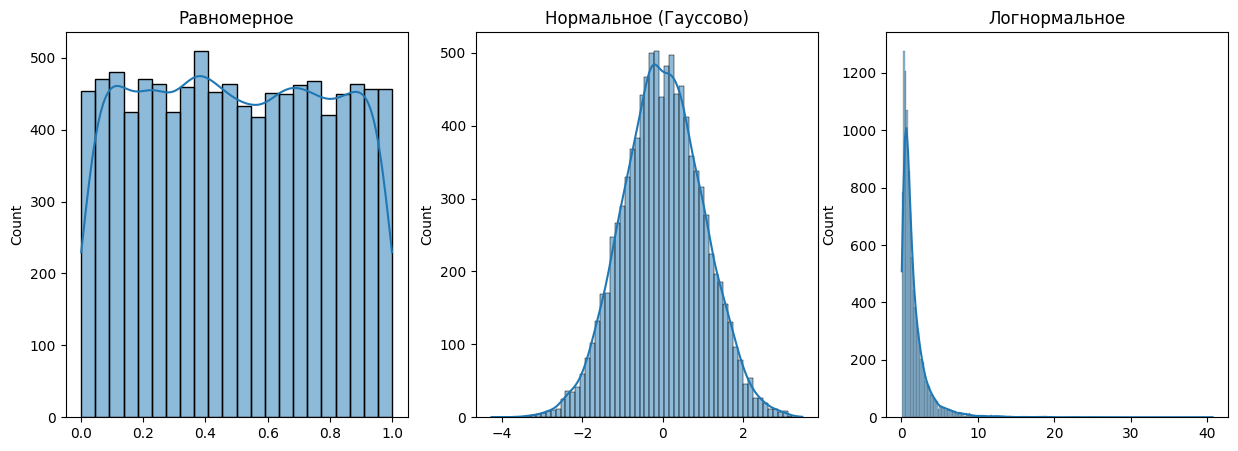

In [36]:
# генерируем синтетические данные
size = 10000

data_unif = np.random.uniform(size=size)
data_norm = np.random.normal(size=size)
data_lognorm = np.random.lognormal(size=size)


fig, axs = plt.subplots( 1, 3 )
fig.set_size_inches( (15, 5) )
axs[0].set_title('Равномерное')
axs[1].set_title('Нормальное (Гауссово)')
axs[2].set_title('Логнормальное')

sns.histplot(data_unif, ax=axs[0], kde=True)
sns.histplot(data_norm, ax=axs[1], kde=True)
sns.histplot(data_lognorm, ax=axs[2], kde=True)


plt.show()


In [31]:
# загрузим реальные данные:
# отзывы на локальные бизнесы из Yelp
df_reviews = pd.read_csv('data/reviews.csv', index_col=0)
display(df_reviews)

# отток клиентов в телекоммуникационной компании
df_telecom = pd.read_csv('data/telecom_churn.csv')
display(df_telecom)

# кредитный скоринг
df_credit = pd.read_csv('data/credit_scoring.csv', index_col=0)
df_credit['Income'] = df_credit['Income'].fillna(df_credit['Income'].median())
display(df_credit)

# модели журнала Playboy
df_playboy = pd.read_csv('data/girls.csv')
display(df_playboy)


,review_count
business_id,
Pns2l4eNsfO8kk83dixA6A,7
mpf3x-BjTdTEA3yCZrAYPw,15
tUFrWirKiKi_TAnsVWINQQ,22
MTSW4McQd7CbVtyjqoe9mw,80
mWMc6_wTdE0EUBKIGXDVfA,13
...,...
2pWRW7ASh_Bw5q5V64Luuw,9
ccwhUs2fCLWTQLMa1L_xNQ,10
6bhEQ4Y3qAJuMxy1xpdJnA,42


,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


,DIR,Age,NumLoans,NumRealEstateLoans,NumDependents,Num30-59Delinquencies,Num60-89Delinquencies,Income,BalanceToCreditLimit,Delinquent90
client_id,,,,,,,,,,
0,0.496289,49.1,13,0,0.0,2,0,5298.360639,0.387028,0
1,0.433567,48.0,9,2,2.0,1,0,6008.056256,0.234679,0
2,2206.731199,55.5,21,1,NaN,1,0,5424.552473,0.348227,0
3,886.132793,55.3,3,0,0.0,0,0,5424.552473,0.971930,0
4,0.000000,52.3,1,0,0.0,0,0,2504.613105,1.004350,0
...,...,...,...,...,...,...,...,...,...,...
74995,0.169463,67.6,5,1,0.0,0,0,20129.654428,0.074689,0
74996,2085.662215,43.2,1,1,0.0,0,0,5424.552473,1.005390,0
74997,0.118935,23.0,4,0,0.0,2,0,2019.117329,0.384511,0


,Month,Year,Bust,Waist,Hips,Height,Weight
0,December,1953,91,61,91,165,54
1,March,1954,86,61,89,168,54
2,July,1955,91,61,91,166,52
3,December,1955,91,61,91,166,52
4,July,1956,91,61,86,157,48
...,...,...,...,...,...,...,...
599,September,2008,86,64,91,170,52
600,October,2008,86,61,86,165,52
601,November,2008,86,53,81,168,49
602,December,2008,86,64,89,173,52


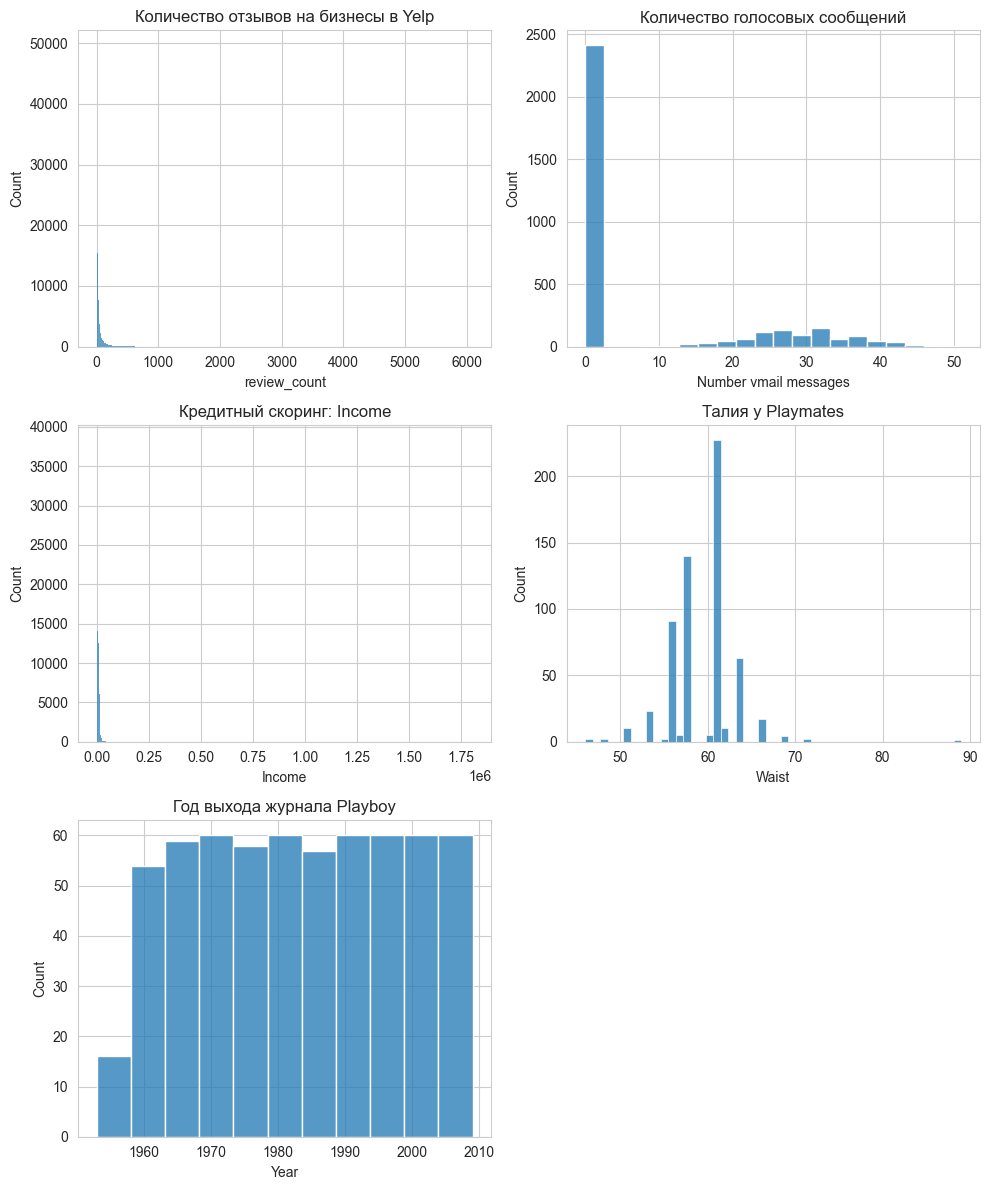

In [143]:
fig, axs = plt.subplots( 3, 2 )
fig.set_size_inches( (10, 12) )
axs = axs.ravel()
axs[0].set_title('Количество отзывов на бизнесы в Yelp')
axs[1].set_title('Количество голосовых сообщений')
axs[2].set_title('Кредитный скоринг: Income')
axs[3].set_title('Талия у Playmates')
axs[4].set_title('Год выхода журнала Playboy')

sns.histplot(df_reviews['review_count'], ax=axs[0])
sns.histplot(df_telecom['Number vmail messages'], ax=axs[1])
sns.histplot(df_credit['Income'], ax=axs[2])
sns.histplot(df_playboy['Waist'], ax=axs[3])
sns.histplot(df_playboy['Year'], ax=axs[4])

axs[5].axis('off')

fig.tight_layout()

plt.show()

Чем плохи некоторые из этих распределений?
- они __ассиметричны__, имеют длинный хвост справа
- данные имеют __широкий диапазон__ значений: от 0 до 1e3 - 1e6
- в них много __выбросов__
- они __не нормальны__, что нарушает предпосылки многих моделей машинного обучения.

Самое главное - для использовании линейных моделей и кластеризации данные **не масштабированы** и потому непригодны.

**Что делать?** Можно ли привести данные к нормальному или как можно близкому к нормальному распределению?

Вот какие способы можно для этого использовать:
- избавление от выбросов
- нормализация или шкалирование данных
- квантильные преобазования или бининг, категоризация данных
- степенные преобразования: логарифмирование, преобразования Бокса-Кокса или Йео-Джонсона


## 1. Обнаружение выбросов и избавление от них

По классике: измерим межквартильный размах - различие между величиной 3-го квартиля и 1-го квартиля. 
**Межквантильный размах** (англ. *interquartile range*, **IQR**) — это статистическая мера **разброса данных**, основанная на **квартилях**. 

$
\text{IQR} = Q_3 - Q_1
$

* $Q_1$ — первый квартиль (25‑й процентиль)
* $Q_3$ — третий квартиль (75‑й процентиль)



#### **Поиск выбросов** (outliers):

Классическое правило Тьюки (Tukey):

* **Нижняя граница**:

  $
  Q_1 - 1.5 \cdot IQR
  $
* **Верхняя граница**:

  $
  Q_3 + 1.5 \cdot IQR
  $

Все значения **за пределами этих границ** считаются выбросами.

На примере талий девушек журнала Playboy:



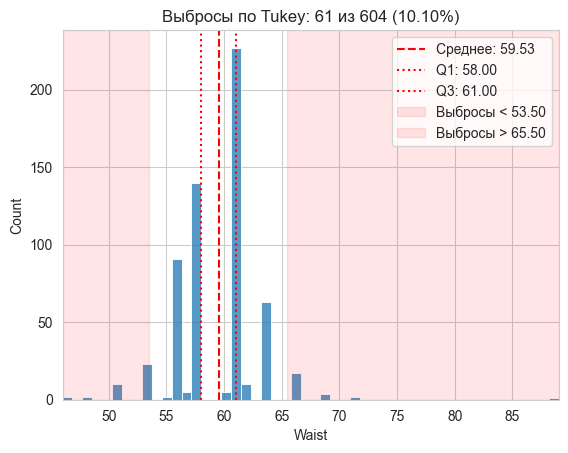

In [153]:
def plot_outliers_tukey(data, ax, bins='auto'):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    sns.histplot(data, ax=ax, bins=bins)
    ax.axvline(data.mean(), color='r', linestyle='--', label=f'Среднее: {data.mean():.2f}')
    ax.axvline(Q1, color='r', linestyle=':', label=f'Q1: {Q1:.2f}')
    ax.axvline(Q3, color='r', linestyle=':', label=f'Q3: {Q3:.2f}')

    ax.axvspan(data.min(), lower_bound, alpha=0.1, color='red', label=f'Выбросы < {lower_bound:.2f}')
    ax.axvspan(upper_bound, data.max(), alpha=0.1, color='red', label=f'Выбросы > {upper_bound:.2f}')
    ax.set_xlim((data.min(), data.max()))

    # к фильтрации:
    mask = (data < lower_bound) | (data > upper_bound)
    ax.set_title(f'Выбросы по Tukey: {mask.sum()} из {data.shape[0]} ({mask.sum()/data.shape[0]:.2%})')

    ax.legend()

fig, ax = plt.subplots(1, 1)

plot_outliers_tukey(df_playboy['Waist'], ax)

plt.show()

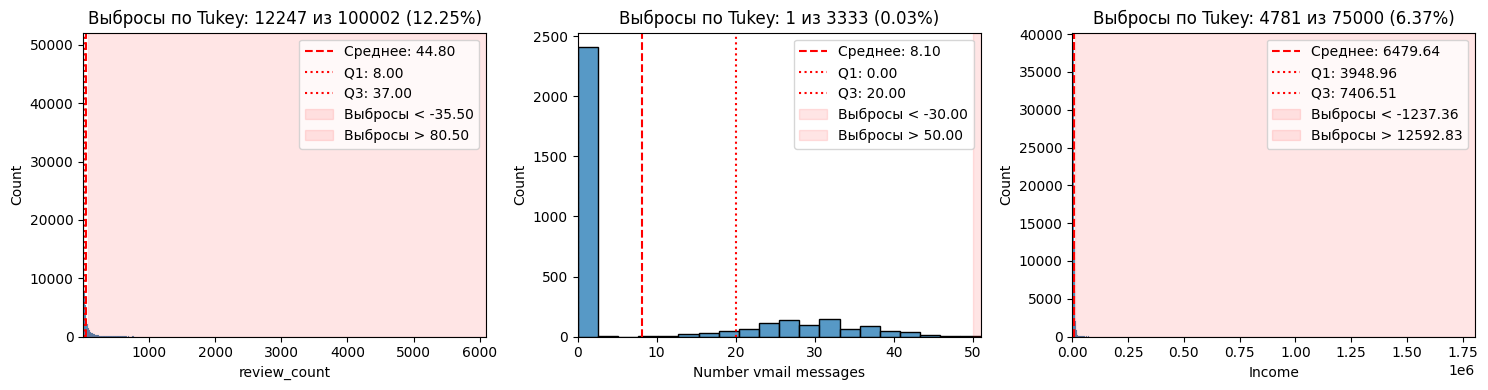

In [ ]:
# посмотрим что там у других данных
fig, axs = plt.subplots( 1, 3 )
fig.set_size_inches( (15, 4) )

plot_outliers_tukey(df_reviews['review_count'], ax=axs[0])
plot_outliers_tukey(df_telecom['Number vmail messages'], ax=axs[1])
plot_outliers_tukey(df_credit['Income'], ax=axs[2])    

fig.tight_layout()

plt.show()

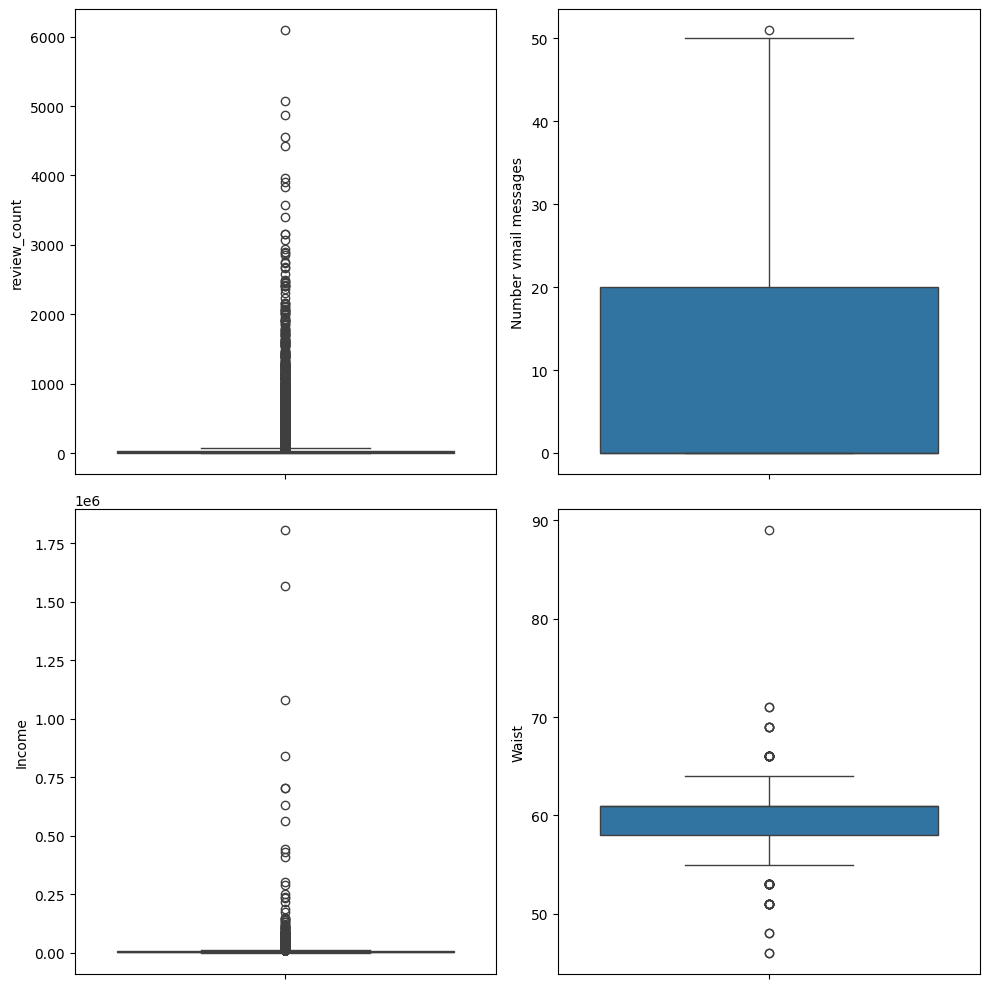

In [73]:
fig, axs = plt.subplots( 2, 2 )
fig.set_size_inches( (10, 10) )
axs = axs.flatten()

sns.boxplot(df_reviews['review_count'], ax=axs[0])
sns.boxplot(df_telecom['Number vmail messages'], ax=axs[1])
sns.boxplot(df_credit['Income'], ax=axs[2])
sns.boxplot(df_playboy['Waist'], ax=axs[3])

fig.tight_layout()

plt.show()

## 2. Нормализация и шкалирование данных

Когда требуется масштабирование данных?
1. Для работы с алгоритмами машинного обучения на базе линейной модели (Logistic Regression, SVM, глубокое обучение)
2. Для кластерного анализа (k-means, DBSCAN, прочее)
3. При работе с алгоритмами поиска ближайших соседей (kNN, ANNOY, прочее)
3. Для статистического анализа данных
4. При уменьшении размерности данных методами PCA и t-SNE.

Существует несколько методов нормализации/шкалирования/масштабирования данных. Вот некоторые из них:

1. **Min-Max шкалирование**: Приведение значений признака в диапазон [0, 1].
3. **L2-нормализация: или "горизонтальное шкалирование"**: Приведение числовых данных к значениям в диапазоне [0, 1], но в рамках каждой записи в таблице.
2. **Стандартное шкалирование (Z-оценка, стандартизация)**: Центрирование, приведение данных к нулевому среднему и единичной дисперсии.
3. **Робустное шаклирование**: центрирование данных с использованием межквартильного интервала.


Эти операции применяются унифицированно ко всем признакам в датасете: 
- если вы выбрали Min-Max или нормализацию (что-то одно), то все признаки должны быть в диапазоне [0,1], 
- если выбрали StandardScaler или RobustScaler - то все признаки в итоговом датасете должны быть "отцентрированы".

Не стоит прибегать к масштабированию данных в следующих случаях:
- когда используются деревья решений и другие алгоритмы, основанные на них;
- для данных, которые уже примерно в одном масштабе.


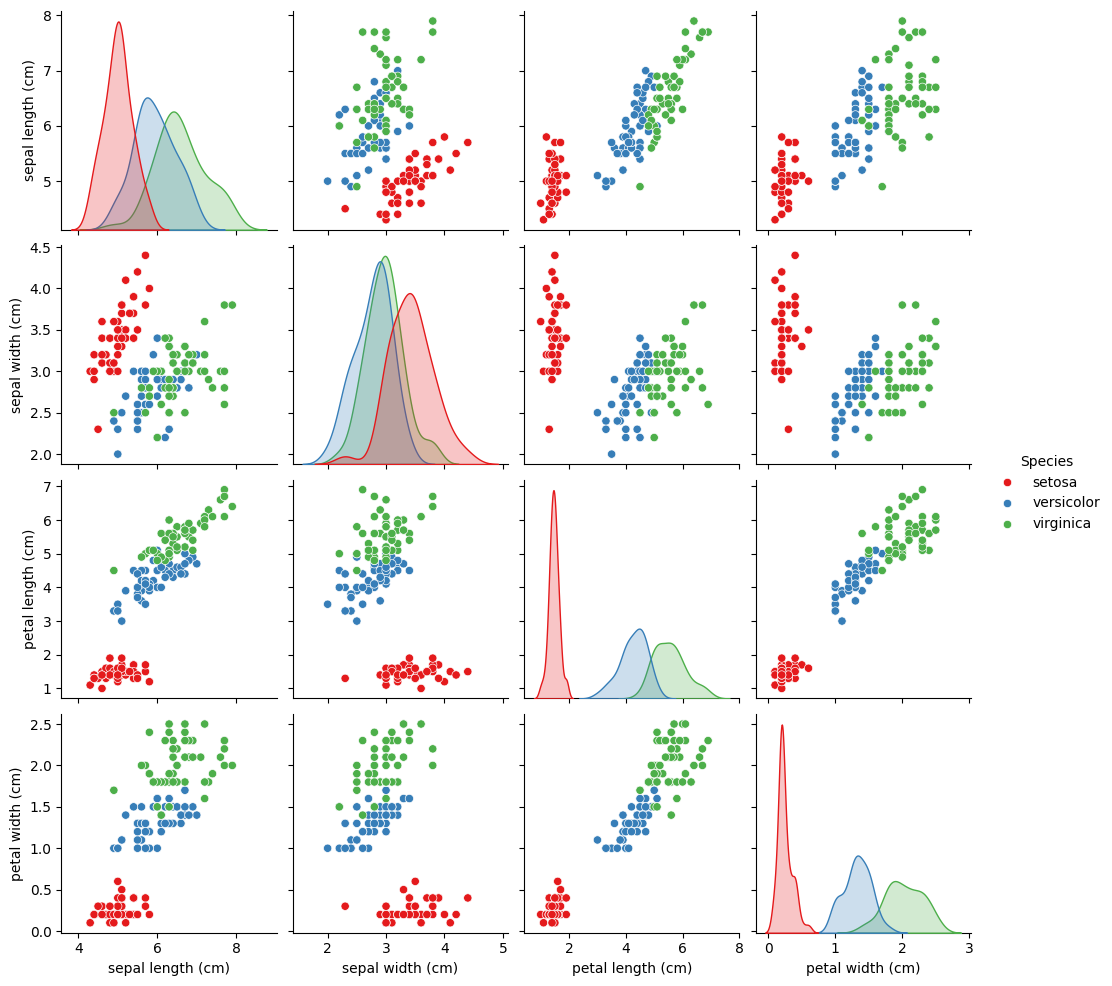

In [78]:
from sklearn.datasets import load_iris

iris = load_iris()
df_iris = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df_iris['Species'] = iris.target_names[iris.target]
sns.pairplot(df_iris, diag_kind='kde', hue='Species', palette='Set1')
plt.show()

### Min-Max шкалирование

$\tilde{x}_i = \frac{x_i - x_{min}}{x_{max} - x_{min}}$

Применяется, если в датасете:
- наличествуют бинарные (0,1) признаки;
- данные имеют разные единицы измерения, разный масштаб и требуется привести их к одному диапазону, но при этом с сохранением пропорций "большой-маленький";
- количественные данные распределены нормально или близко к нормальному;
- выбросы в количественных признаках невелики и их масштабирование не приведет к сужению диапазона в рабочих данных.

Применяется ко всем признакам в датасете.

Категориальные признаки имеет смысл закодировать методом one-hot (и потом, возможно, избавиться от части из них).






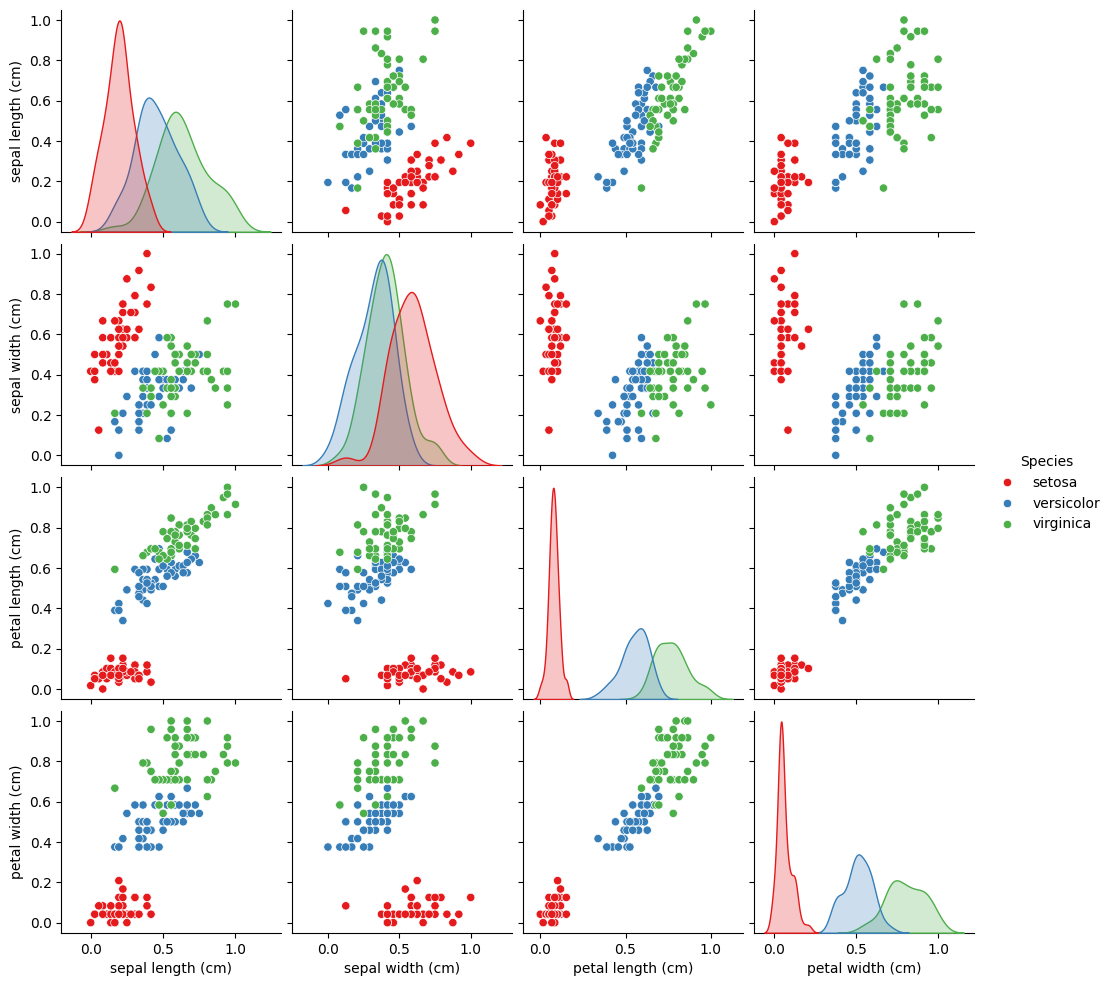

In [79]:
# Min-Max шкалирование
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_iris_scaled = df_iris.copy()
df_iris_scaled[iris.feature_names] = scaler.fit_transform(df_iris[iris.feature_names])
sns.pairplot(df_iris_scaled, diag_kind='kde', hue='Species', palette='Set1')
plt.show()

### L2-нормализация: или "горизонтальное шкалирование"

Каждый вектор признаков (строка в таблице) нормируется отдельно, чтобы его длина (евклидова норма) была равна 1.

Формула для L2-нормализации:

$\tilde{x}_i = \frac{x_i}{\|x\|_2}$

где $\|x\|_2 = \sqrt{\sum_{j=1}^{n} x_j^2}$ - L2-норма (евклидова длина) вектора признаков.

Применяется ко всем признакам в датасете.

Данный метод полезен, когда важен не абсолютный масштаб признаков, а их относительные пропорции внутри каждой записи. 

**ВАЖНО:** L2-номализация уничтожает информацию о масштабе, сохраняя информацию о направлении в многомерном пространстве признаков.  Подходит для задач, где  в качестве метрики используется косинусное расстояние (например, анализ текстов). **Во всех остальных задачах, как правило, L2-нормализация неприменима.**

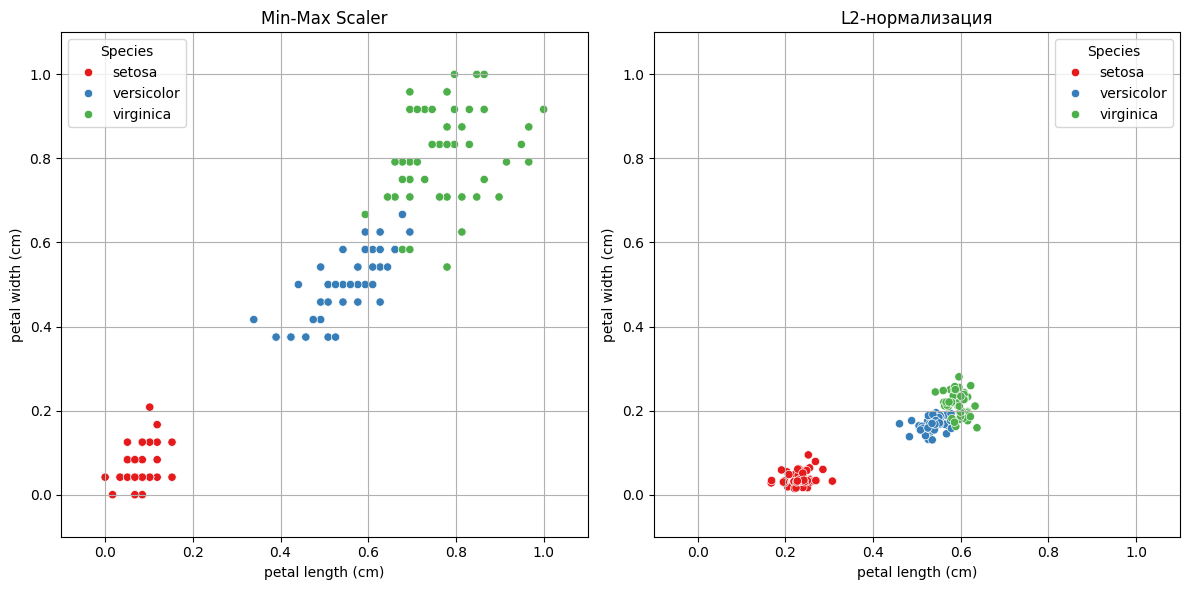

In [93]:
# Горизонтальное шкалирование
from sklearn.preprocessing import normalize
df_iris_horizontal = df_iris.copy()
df_iris_horizontal[iris.feature_names] = normalize(df_iris[iris.feature_names], axis=1)

x, y = ['petal length (cm)', 'petal width (cm)']

fig, axs = plt.subplots( 1, 2 )
fig.set_size_inches( (12, 6) )
axs[0].set_title('Min-Max Scaler')
sns.scatterplot(data=df_iris_scaled, x=x, y=y, hue='Species', ax=axs[0], palette='Set1')
axs[1].set_title('L2-нормализация')
sns.scatterplot(data=df_iris_horizontal, x=x, y=y, hue='Species', ax=axs[1], palette='Set1')

for ax in axs:
    ax.set_xlim((-0.1, 1.1))
    ax.set_ylim((-0.1, 1.1))
    ax.grid()
    
fig.tight_layout()
plt.show()

### Стандартное шкалирование (Z-оценка, стандартизация)

$\tilde{x}_i = \frac{x_i - \mu}{\sigma}$

Происходит "центрирование" данных относительно начала координат: мат. ожидание приводится к 0, а дисперсия - к 1. Стандартное шкалирование помогает "сгладить" выбросы, но если они лежат в широком диапазоне - то данный метод не улучшит ситуацию.

Применять в следующих случаях:
- **всегда** при работе с Logistic Regression и L2/Ridge регуляризацией;
- **всегда** для оценки данных с помощью критерия Колмогорова-Смирнова на соответствие нормальному распределению;
- в остальном применим в тех же случаях, что и Min-Max;
- данный метод применим, когда в данных присутствуют незначительные выбросы.

#### Робустное шкалирование

$
x_{\text{scaled}} = \frac{x - \text{median}}{\text{IQR}}
= \frac{x - Q_2}{Q_3 - Q_1}
$

Где:

* $Q_1$ — 25-й перцентиль
* $Q_2$ — медиана
* $Q_3$ — 75-й перцентиль
* $IQR = Q_3 - Q_1$

Тоже метод "центрирования" данных относительно начала координат. Может использоваться в сочетании со StandardScaler. Применим, когда в данных есть относительно большие выбросы.



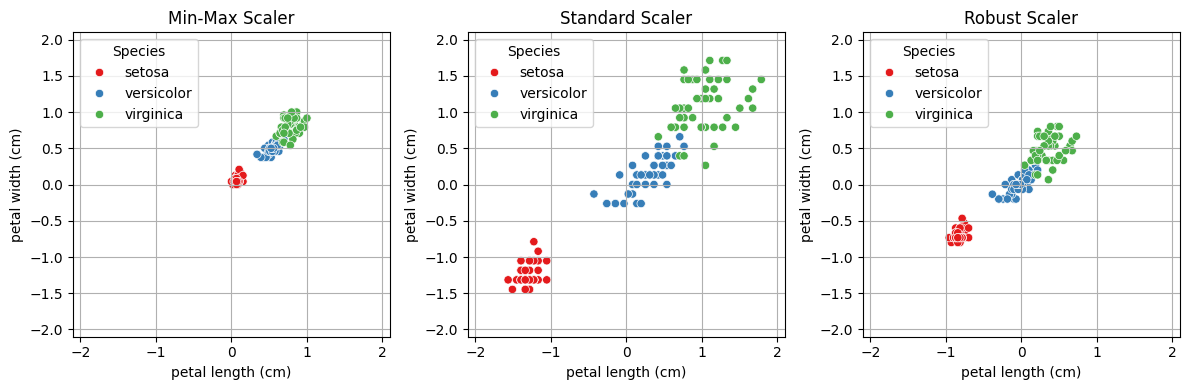

In [98]:
# Стандартное шкалирование (Z-оценка, стандартизация)
from sklearn.preprocessing import StandardScaler, RobustScaler

df_iris_standardized = df_iris.copy()
df_iris_standardized[iris.feature_names] = StandardScaler().fit_transform(df_iris[iris.feature_names])
df_iris_robust = df_iris.copy()
df_iris_robust[iris.feature_names] = RobustScaler().fit_transform(df_iris[iris.feature_names])

x, y = ['petal length (cm)', 'petal width (cm)']

fig, axs = plt.subplots( 1, 3 )
fig.set_size_inches( (12, 4) )
axs[0].set_title('Min-Max Scaler')
sns.scatterplot(data=df_iris_scaled, x=x, y=y, hue='Species', ax=axs[0], palette='Set1')
axs[1].set_title('Standard Scaler')
sns.scatterplot(data=df_iris_standardized, x=x, y=y, hue='Species', ax=axs[1], palette='Set1')
axs[2].set_title('Robust Scaler')
sns.scatterplot(data=df_iris_robust, x=x, y=y, hue='Species', ax=axs[2], palette='Set1')

for ax in axs:
    ax.set_xlim((-2.1, 2.1))
    ax.set_ylim((-2.1, 2.1))
    ax.grid()
    
fig.tight_layout()
plt.show()

In [ ]:
#  Как это работает на реальных данных?
df_credit['Income_std'] = StandardScaler().fit_transform(df_credit[['Income']])
df_credit['Income_robust'] = RobustScaler().fit_transform(df_credit[['Income']])

df_credit[['Income', 'Income_std', 'Income_robust']].describe().round(4)

,Income,Income_std,Income_robust
count,7.500000e+04,75000.0000,75000.0000
mean,6.479642e+03,-0.0000,0.3052
std,1.275356e+04,1.0000,3.6886
min,0.000000e+00,-0.5081,-1.5689
25%,3.948961e+03,-0.1984,-0.4268
50%,5.424552e+03,-0.0827,0.0000
75%,7.406509e+03,0.0727,0.5732
max,1.805573e+06,141.0670,520.6433


#### ⁉️ Задание

Шкалируйте различные признаки из датасетов, рассмотренных в этом ноутбуке, используя различные методы шкалирования.
Сравните результаты и сделайте выводы.

In [ ]:
# ваш код здесь



### 3. Визуальный анализ "сложных" данных


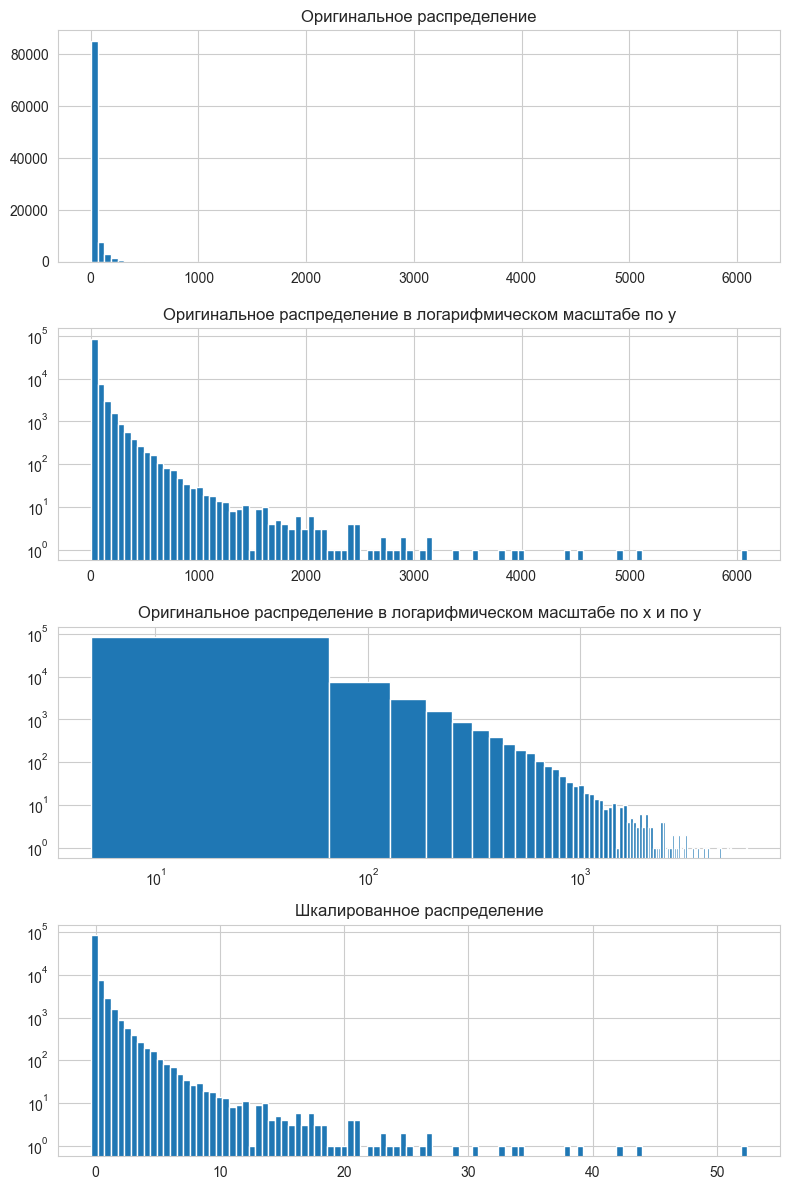

In [ ]:
# влияние масштаба шкал по x и по y, а также количества корзин (bins) в гистограммах
sns.set_style('whitegrid')
fig, axs = plt.subplots(4, 1)

bins = 100

data = df_reviews['review_count']
# data = df_telecom['Number vmail messages']
# data = df_credit['Income']

fig.set_size_inches( (8, 12) )
axs[0].set_title('Оригинальное распределение')
axs[1].set_title('Оригинальное распределение в логарифмическом масштабе по y')
axs[2].set_title('Оригинальное распределение в логарифмическом масштабе по x и по y')
axs[3].set_title('Шкалированное распределение')

data_std = pd.Series(StandardScaler().fit_transform(data.values.reshape(-1, 1)).ravel(), index=data.index)

data.hist(ax=axs[0], bins=bins)
data.hist(ax=axs[1], bins=bins)
data.hist(ax=axs[2], bins=bins)
data_std.hist(ax=axs[3], bins=bins)

for i in [1,2,3]:  axs[i].set_yscale('log')
axs[2].set_xscale('log')

fig.tight_layout()
plt.show()

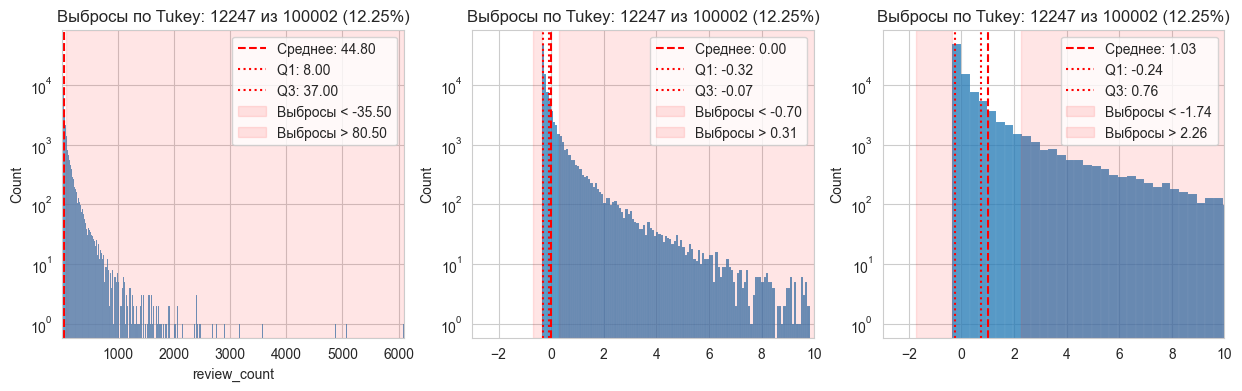

In [138]:
# Посмотрим как повлияло шкалирование на выбросы по правилу Тьюки
fig, axs = plt.subplots(1, 3, figsize=(15, 4))

data = df_reviews['review_count']
# data = df_telecom['Number vmail messages']
# data = df_credit['Income']

data_std = pd.Series(StandardScaler().fit_transform(data.values.reshape(-1, 1)).ravel(), index=data.index)
data_robust = pd.Series(RobustScaler().fit_transform(data.values.reshape(-1, 1)).ravel(), index=data.index)



plot_outliers_tukey(data, axs[0])
plot_outliers_tukey(data_std, axs[1])
plot_outliers_tukey(data_robust, axs[2])

for i in [0, 1, 2]:  axs[i].set_yscale('log')

for ax in axs[-2:]:
    ax.set_xlim((-3, 10))

plt.show()

## 3. Степенные преобразования (логарифмирование, Box-Cox, Yeo-Johnson)

Логарифмирование можно применять только к положительным значениям признака.

Если после логарифмирования распределение не сильно приблизилось к нормальныму, можно попробовать Box-Cox или Yeo-Johnson.

Yeo-Johnson можно применять к отрицательным и нулевым значениям.

### Логарифмирование

Логарифмирование имеет смысл применять только если гистограмма напоминает логнормальное распределение: основная мода смещена сильно вправо.

Логарифмирование не может быть применено к нулевым и отрицательным значениям.

Если встречаются нулевые значения - имеет смысл использовать формулу ```log(x + 1)```. Для работы с отрицательными значениями следует использовать преобразование Yeo-Johnson'а.

Какое основание выбрать?
- если нужна интерпретируемость данных (которые представлены десятичными числами) - ```log10()```;
- если нужна интерпретируемость двоичных, битовых данных - ```log2()```;
- если не нужна интерпретируемость - ```ln()```.

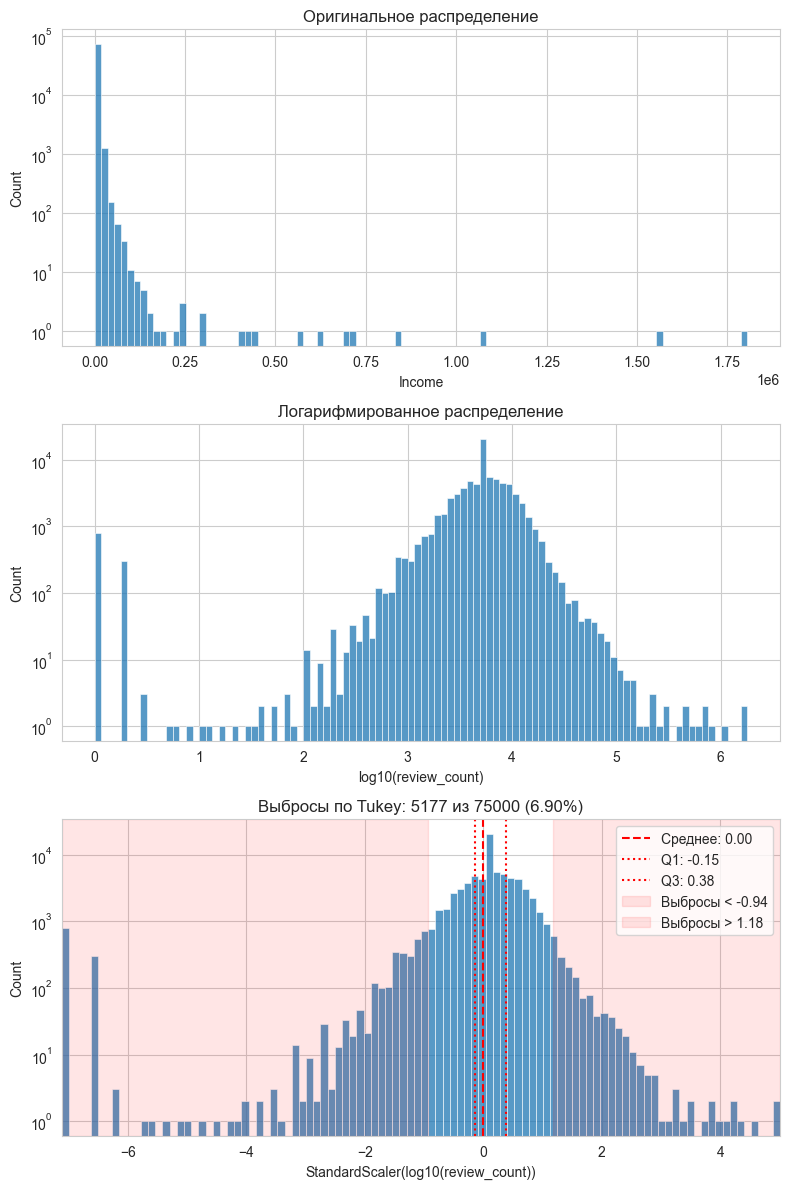

In [158]:
# Логарифмирование

sns.set_style('whitegrid')
fig, axs = plt.subplots(3, 1)

data = df_credit['Income']
# data = df_reviews['review_count']

fig.set_size_inches( (8, 12) )
axs[0].set_title('Оригинальное распределение')
axs[1].set_title('Логарифмированное распределение')
axs[2].set_title('Логарифмированное и затем шкалированное распределение')

data_log = pd.Series(np.log10(data + 1), index=data.index, name="log10(review_count)")
data_log_std = pd.Series(StandardScaler().fit_transform(data_log.values.reshape(-1, 1)).ravel(), index=data_log.index, name="StandardScaler(log10(review_count))")


sns.histplot(data, ax=axs[0], bins=100)
sns.histplot(data_log, ax=axs[1], bins=100)
plot_outliers_tukey(data_log_std, ax=axs[2], bins=100)

for i in range(3): axs[i].set_yscale('log')
fig.tight_layout() 

plt.show()

### Степенные преобразования Бокса-Кокса и Йео-Джонсона

Формула преобразования Бокса-Кокса:

$y^{(\lambda )}_i =\begin{cases}\frac{y^\lambda_i-1}{\lambda}&\lambda \neq 0\cr \ln(y) &\lambda =0\end{cases}.$

и Йео-Джонсона:

$y^{(\lambda )}_i =\begin{cases}[{(y_i + 1)^\lambda-1}]/{\lambda} &\lambda \neq 0, y_i \geq 0 \cr\
\ln(y)&\lambda = 0, y_i \geq 0 \cr\
-[(-y_i + 1)^{(2-\lambda)} - 1]/(2 - \lambda) &\lambda \neq 2, y_i < 0 \cr\
-\ln(-y_i+1）&\lambda = 2, y_i < 0
\end{cases}.$

Параметр $\lambda$ подбирается алгоримами автоматически для лучше нормализации.

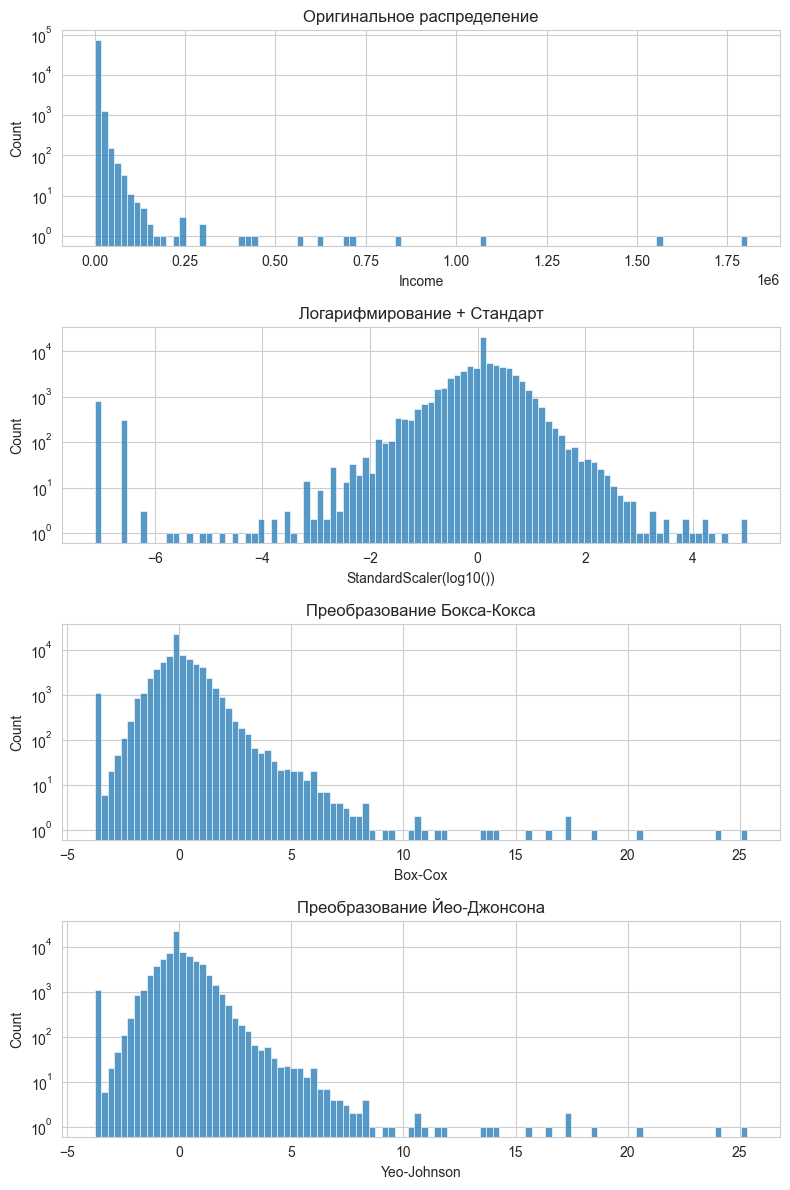

In [169]:
from sklearn.preprocessing import PowerTransformer

pt_boxcox = PowerTransformer(method='box-cox')
pt_yeo = PowerTransformer(method='yeo-johnson')


sns.set_style('whitegrid')
fig, axs = plt.subplots(4, 1)

data = df_credit['Income']
# data = df_reviews['review_count']

fig.set_size_inches( (8, 12) )
axs[0].set_title('Оригинальное распределение')
axs[1].set_title('Логарифмирование + Стандарт')
axs[2].set_title('Преобразование Бокса-Кокса')
axs[3].set_title('Преобразование Йео-Джонсона')

data_log = pd.Series(np.log10(data + 1), index=data.index, name="log10(review_count)")
data_log_std = pd.Series(StandardScaler().fit_transform(data_log.values.reshape(-1, 1)).ravel(), index=data_log.index, name="StandardScaler(log10())")

data_boxcox = pd.Series(pt_boxcox.fit_transform(data.values.reshape(-1, 1) + 1).ravel(), index=data.index, name="Box-Cox")
data_yeo = pd.Series(pt_yeo.fit_transform(data.values.reshape(-1, 1)).ravel(), index=data.index, name="Yeo-Johnson")


sns.histplot(data, ax=axs[0], bins=100)
sns.histplot(data_log_std, ax=axs[1], bins=100)
sns.histplot(data_boxcox, ax=axs[2], bins=100)
sns.histplot(data_yeo, ax=axs[3], bins=100)

for ax in axs: ax.set_yscale('log')
# for ax in axs[1:]: ax.set_xlim((-5, 5))
fig.tight_layout() 

plt.show()

## 4. Бининг🗑️ и квантилизация

Биннинг (binning) - это процесс формирования категориальных данных из непрерывных/дискретных количественных данных. Позволяет конвертировать выбросы в категории и сформировать равномерно или событийно наполненные категориальные данные.

Квантилизация - это биннинг по квантильным интервалам. 

Бининг по заданным значениям:

In [252]:
df_credit = pd.read_csv('data/credit_scoring.csv', index_col=0)
display(df_credit) 
df_credit.describe().round(4)

,DIR,Age,NumLoans,NumRealEstateLoans,NumDependents,Num30-59Delinquencies,Num60-89Delinquencies,Income,BalanceToCreditLimit,Delinquent90
client_id,,,,,,,,,,
0,0.496289,49.1,13,0,0.0,2,0,5298.360639,0.387028,0
1,0.433567,48.0,9,2,2.0,1,0,6008.056256,0.234679,0
2,2206.731199,55.5,21,1,NaN,1,0,NaN,0.348227,0
3,886.132793,55.3,3,0,0.0,0,0,NaN,0.971930,0
4,0.000000,52.3,1,0,0.0,0,0,2504.613105,1.004350,0
...,...,...,...,...,...,...,...,...,...,...
74995,0.169463,67.6,5,1,0.0,0,0,20129.654428,0.074689,0
74996,2085.662215,43.2,1,1,0.0,0,0,NaN,1.005390,0
74997,0.118935,23.0,4,0,0.0,2,0,2019.117329,0.384511,0


,DIR,Age,NumLoans,NumRealEstateLoans,NumDependents,Num30-59Delinquencies,Num60-89Delinquencies,Income,BalanceToCreditLimit,Delinquent90
count,75000.0000,75000.0000,75000.0000,75000.0000,73084.0000,75000.0000,75000.0000,6.015300e+04,75000.0000,75000.0000
mean,353.2603,52.5956,8.4498,1.0167,0.7560,0.4283,0.2480,6.740059e+03,6.2762,0.0668
std,2117.2374,14.8697,5.1564,1.1240,1.1081,4.2764,4.2395,1.422875e+04,267.7433,0.2497
min,0.0000,21.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000000e+00,0.0000,0.0000
25%,0.1760,41.3000,5.0000,0.0000,0.0000,0.0000,0.0000,3.421354e+03,0.0297,0.0000
50%,0.3668,52.2000,8.0000,1.0000,0.0000,0.0000,0.0000,5.424552e+03,0.1537,0.0000
75%,0.8626,63.1000,11.0000,2.0000,1.0000,0.0000,0.0000,8.291518e+03,0.5606,0.0000
max,332600.2728,109.8000,56.0000,32.0000,20.0000,98.0000,98.0000,1.805573e+06,50873.8745,1.0000


In [255]:
# разберемся с признаком Income
print(f"Пропусков в Income: {df_credit['Income'].isna().sum()} из {df_credit.shape[0]} ({df_credit['Income'].isna().sum()/df_credit.shape[0]:.2%})")
# создадим series без пропусков
s_income = df_credit['Income'].dropna()
# и series где пропуски заполнены медианой
s_income_median = df_credit['Income'].fillna(df_credit['Income'].median())

Пропусков в Income: 14847 из 75000 (19.80%)


In [256]:
bins = [0, 4000, 5000, 6000, 7000, 8000, 2e6]

labels = [f"{border}-{bins[i+1]}" for i, border in enumerate(bins[:-1]) ]

# формируем категории через pd.cut
s_income_catg = pd.cut(s_income, bins=bins, labels=labels)
display(s_income_catg)

# формируем onehot-кодирование категорий
df_income_onehot = pd.get_dummies( s_income_catg ).astype(int)
df_income_onehot

client_id
0             5000-6000
1             6000-7000
4                0-4000
5        8000-2000000.0
6                0-4000
              ...      
74994    8000-2000000.0
74995    8000-2000000.0
74997            0-4000
74998    8000-2000000.0
74999    8000-2000000.0
Name: Income, Length: 60153, dtype: category
Categories (6, object): ['0-4000' < '4000-5000' < '5000-6000' < '6000-7000' < '7000-8000' < '8000-2000000.0']

,0-4000,4000-5000,5000-6000,6000-7000,7000-8000,8000-2000000.0
client_id,,,,,,
0,0,0,1,0,0,0
1,0,0,0,1,0,0
4,1,0,0,0,0,0
5,0,0,0,0,0,1
6,1,0,0,0,0,0
...,...,...,...,...,...,...
74994,0,0,0,0,0,1
74995,0,0,0,0,0,1
74997,1,0,0,0,0,0


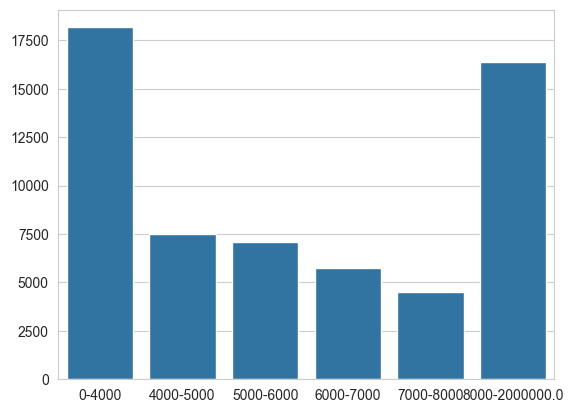

In [257]:
sns.barplot(df_income_onehot.sum());

Квантилизация по децилям:

In [258]:
deciles = s_income.quantile(np.arange(0.1, 1.0, 0.1))
deciles

0.1     2033.350088
0.2     3014.078595
0.3     3825.632370
0.4     4584.649930
0.5     5424.552473
0.6     6329.953321
0.7     7543.288614
0.8     9140.860581
0.9    11720.520611
Name: Income, dtype: float64

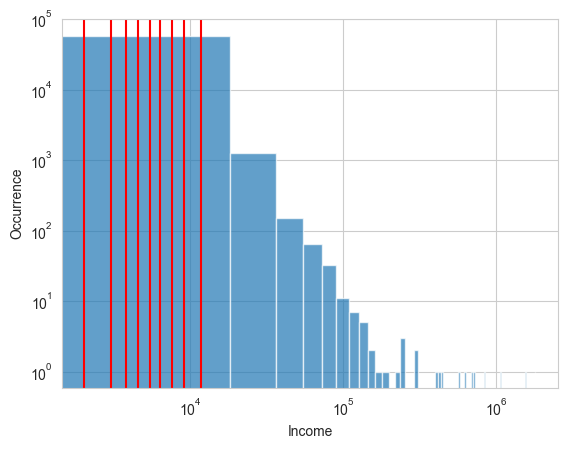

In [259]:
fig, ax = plt.subplots()
s_income.hist(ax=ax, bins=100, alpha=0.7)
for pos in deciles:
    handle = plt.axvline(pos, color='r')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('Income')
ax.set_ylabel('Occurrence')
plt.show()

In [260]:
deciles_ = pd.concat([pd.Series([0.0]), deciles, pd.Series([2.0e6])])
display(deciles_)

labels = [f"{i+1}: {v:.0f}-{deciles_.iloc[i+1]:.0f}" for i, (q, v) in enumerate(deciles_.iloc[:-1].items()) ]

df_income_dec = pd.get_dummies( 
    pd.cut(s_income, bins=deciles_, labels=labels), 
    prefix='q', 
    dtype=np.int64
)
df_income_dec

0.0    0.000000e+00
0.1    2.033350e+03
0.2    3.014079e+03
0.3    3.825632e+03
0.4    4.584650e+03
0.5    5.424552e+03
0.6    6.329953e+03
0.7    7.543289e+03
0.8    9.140861e+03
0.9    1.172052e+04
0.0    2.000000e+06
dtype: float64

,q_1: 0-2033,q_2: 2033-3014,q_3: 3014-3826,q_4: 3826-4585,q_5: 4585-5425,q_6: 5425-6330,q_7: 6330-7543,q_8: 7543-9141,q_9: 9141-11721,q_10: 11721-2000000
client_id,,,,,,,,,,
0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,1
6,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
74994,0,0,0,0,0,0,0,0,0,1
74995,0,0,0,0,0,0,0,0,0,1
74997,1,0,0,0,0,0,0,0,0,0


q_1: 0-2033            5218
q_2: 2033-3014         6015
q_3: 3014-3826         6015
q_4: 3826-4585         6015
q_5: 4585-5425         6016
q_6: 5425-6330         6015
q_7: 6330-7543         6015
q_8: 7543-9141         6015
q_9: 9141-11721        6015
q_10: 11721-2000000    6016
dtype: int64

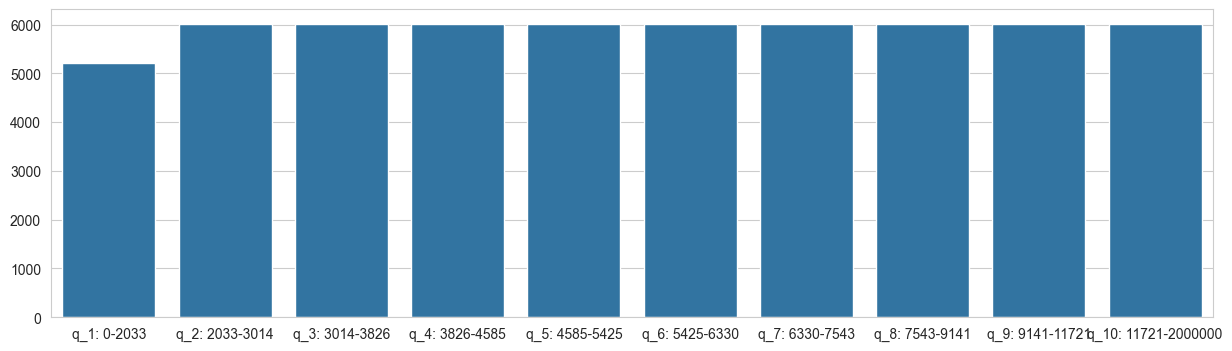

In [261]:
plt.figure(figsize=(15, 4))
display(df_income_dec.sum())
sns.barplot(df_income_dec.sum());

In [266]:
# можно использовать и pd.qcut()
s_income_qcut = pd.qcut(s_income, 
        10, # кол-во корзин/квантилей
        labels=False)
s_income_qcut

client_id
0        4
1        5
4        1
5        9
6        2
        ..
74994    9
74995    9
74997    0
74998    9
74999    8
Name: Income, Length: 60153, dtype: int64

Income
0    6016
1    6015
2    6015
3    6015
4    6016
5    6015
6    6015
7    6015
8    6015
9    6016
Name: count, dtype: int64


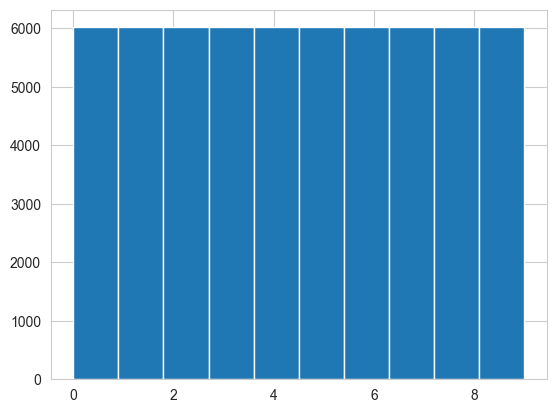

In [268]:
print(s_income_qcut.value_counts().sort_index())
s_income_qcut.hist();

Income
0     7500
1     7500
2     7500
3     7500
4    14924
5       76
6     7500
7     7500
8     7500
9     7500
Name: count, dtype: int64


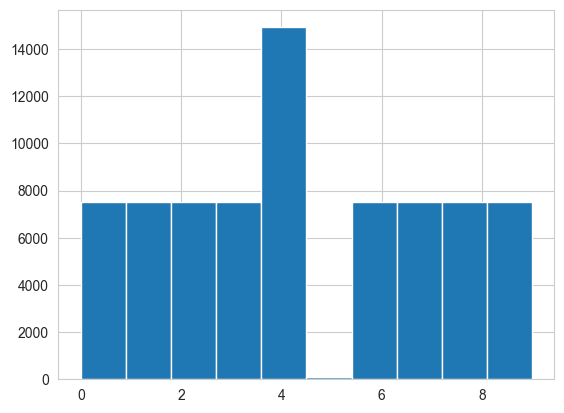

In [ ]:
# выполним такие же преобразования, но уже на series с пропусками, заполненными медианой
s_income_median_qcut = pd.qcut(s_income_median, 
        10, # кол-во корзин/квантилей
        labels=False)
print(s_income_median_qcut.value_counts().sort_index())
s_income_median_qcut.hist();
# как думаете, почему?

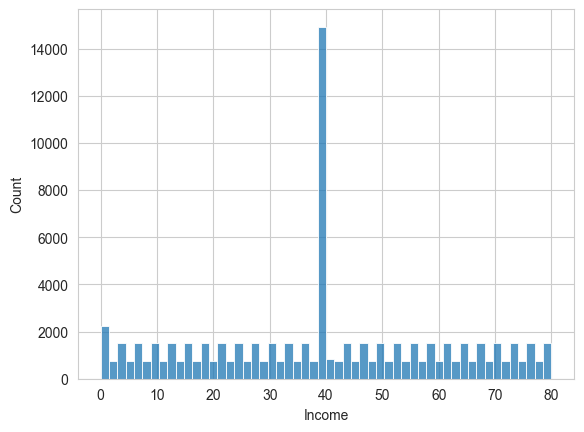

In [ ]:
_ = sns.histplot(pd.qcut(s_income_median, 
                         100, 
                         duplicates="drop", # при наличии одинаковых значений в границах корзин такие корзины будут объединены
                         labels=False))

In [271]:
# посмотрим как справится наш герой на датасете с отзывами на бизнесы из Yelp
# данные дискретные, целочисленные, с большим количеством повторяющихся значений
df_reviews = pd.read_csv('data/reviews.csv', index_col=0)
display(df_reviews)

,review_count
business_id,
Pns2l4eNsfO8kk83dixA6A,7
mpf3x-BjTdTEA3yCZrAYPw,15
tUFrWirKiKi_TAnsVWINQQ,22
MTSW4McQd7CbVtyjqoe9mw,80
mWMc6_wTdE0EUBKIGXDVfA,13
...,...
2pWRW7ASh_Bw5q5V64Luuw,9
ccwhUs2fCLWTQLMa1L_xNQ,10
6bhEQ4Y3qAJuMxy1xpdJnA,42


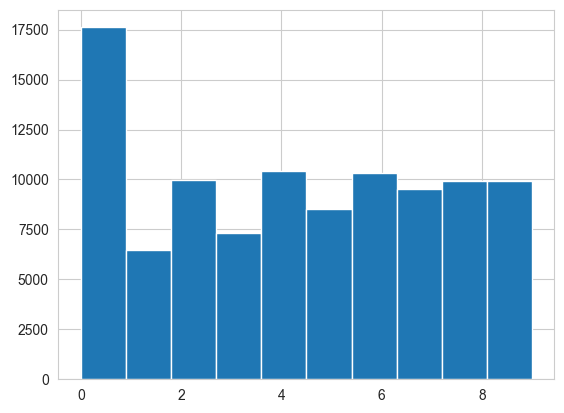

In [274]:
s_review_qcut = pd.qcut(df_reviews['review_count'], 10, labels=False)
s_review_qcut.hist();

In [275]:
deciles = df_reviews['review_count'].quantile(np.arange(0.1, 1.0, 0.1))
deciles

0.1     6.0
0.2     7.0
0.3     9.0
0.4    11.0
0.5    15.0
0.6    20.0
0.7    30.0
0.8    48.0
0.9    98.0
Name: review_count, dtype: float64

Другой способ квантильных преобразований:

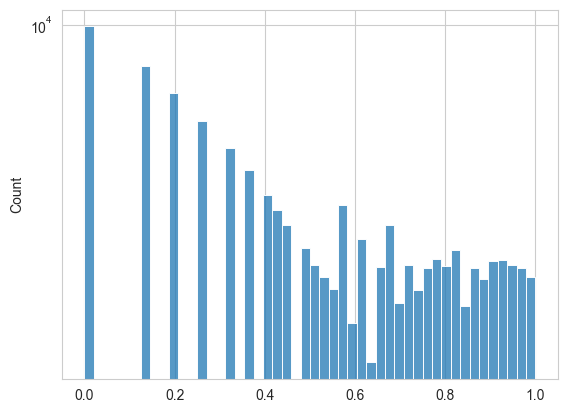

In [ ]:
from sklearn.preprocessing import QuantileTransformer

qt = QuantileTransformer(output_distribution='uniform', # можно поставить 'normal'
                         random_state=0)

_, ax = plt.subplots()
ax.set_yscale('log')
_ = sns.histplot( qt.fit_transform(df_reviews['review_count'].values.reshape(-1,1)).ravel(), ax=ax, legend=None )

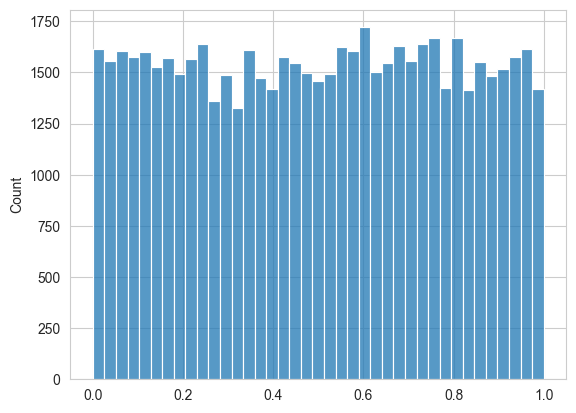

In [286]:
_ = sns.histplot( QuantileTransformer(output_distribution='uniform').fit_transform(s_income.values.reshape(-1,1)).ravel(), legend=None );

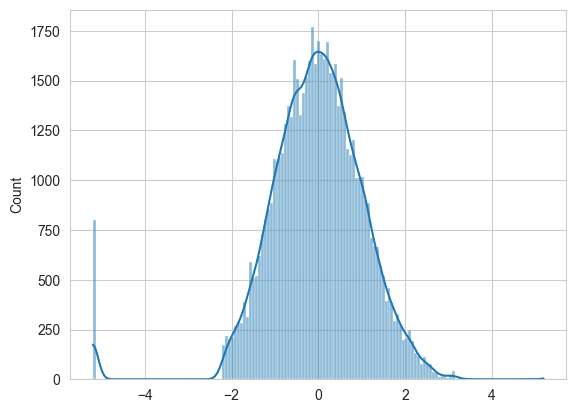

In [288]:
_ = sns.histplot( QuantileTransformer(output_distribution='normal').fit_transform(s_income.values.reshape(-1,1)).ravel(), legend=None, kde=True );

## Используемые материалы и полезные ссылки

- [Using Sklearn’s PowerTransformer (статья на Medium.com)](https://medium.com/@patricklcavins/using-scipys-powertransformer-3e2b792fd712)
- [Предварительная обработка данных (статья на scikit-lean.ru, машинный перевод)](https://scikit-learn.ru/6-3-preprocessing-data/)
- [Проверка статистических гипотез
Дружков П.Н., Золотых Н.Ю., Половинкин А.Н., Чернышова С.Н. статья](http://www.uic.unn.ru/~zny/ml/Old/R/lab2.pdf)
- [Мультимодальные распределения: How to Split Multimodal Distributed Data with Gaussian Mixture Models in Python (статья на medium.com)](https://medium.com/@adev94/how-to-split-multimodal-distribution-with-gaussian-mixture-models-in-python-c87957553e4)
